In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [2]:
from matplotlib import patches
import matplotlib as mpl
from scipy.spatial import ConvexHull


## Corralation
###  Bubble Plot with encircling

In [9]:
midwest = pd.read_csv('../data/midwest_filter.csv')
midwest.head()


,PID,county,state,area,poptotal,popdensity,popwhite,popblack,popamerindian,popasian,...,percprof,poppovertyknown,percpovertyknown,percbelowpoverty,percchildbelowpovert,percadultpoverty,percelderlypoverty,inmetro,category,dot_size
0,561,ADAMS,IL,0.052,66090,1270.961540,63917,1702,98,249,...,4.355859,63628,96.274777,13.151443,18.011717,11.009776,12.443812,0,AAR,250.944411
1,562,ALEXANDER,IL,0.014,10626,759.000000,7054,3496,19,48,...,2.870315,10529,99.087145,32.244278,45.826514,27.385647,25.228976,0,LHR,185.781260
2,563,BOND,IL,0.022,14991,681.409091,14477,429,35,16,...,4.488572,14235,94.956974,12.068844,14.036061,10.852090,12.697410,0,AAR,175.905385
3,564,BOONE,IL,0.017,30806,1812.117650,29344,127,46,150,...,4.197800,30337,98.477569,7.209019,11.179536,5.536013,6.217047,1,ALU,319.823487
4,565,BROWN,IL,0.018,5836,324.222222,5264,547,14,5,...,3.367680,4815,82.505140,13.520249,13.022889,11.143211,19.200000,0,AAR,130.442161


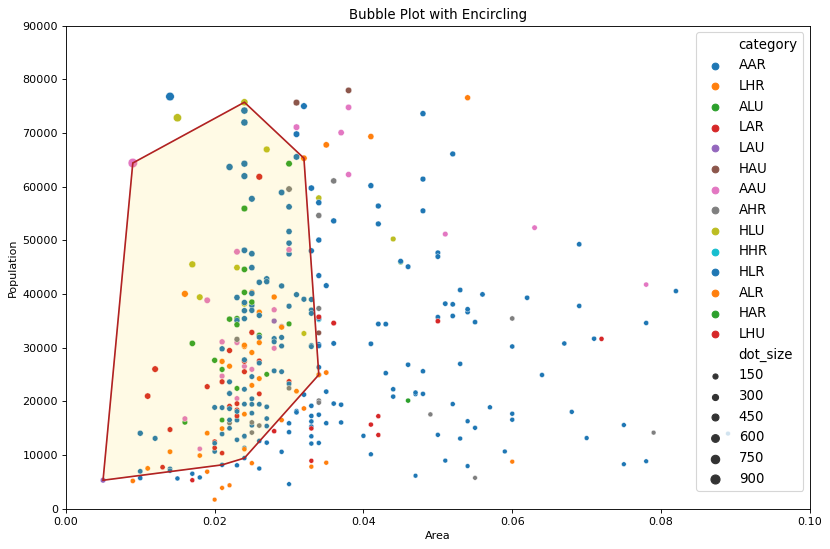

In [24]:
_, ax = plt.subplots(figsize=(12, 8), dpi=80)

g = sns.scatterplot(x='area',
                                   y='poptotal',
                                   data=midwest,
                                   hue='category', 
                                   palette='tab10',
                                    size='dot_size',
                                    ax=ax)

# Encircling


def encircle(x, y, ax=None, **kw):
    if not ax:
        ax = plt.gca()
    p = np.c_[x, y]
    hull = ConvexHull(p)
    poly = patches.Polygon(xy=p[hull.vertices, :], closed=True, **kw)
    ax.add_patch(poly)


g.set(xlim=(0.0, 0.1), ylim=(0, 90000), xlabel='Area', ylabel='Population')

# Select data to be encircled
midwest_encircle_data = midwest.query('state == "IN"')

# Draw polygon surrounding vertices
encircle(midwest_encircle_data.area,
         midwest_encircle_data.poptotal,
         edgecolor='k',
         facecolor='gold',
         alpha=0.1)
encircle(midwest_encircle_data.area,
         midwest_encircle_data.poptotal,
         edgecolor='firebrick',
         facecolor='none',
         linewidth=1.5)

# ax.set(xticks=fontsize=12)
# ax.set(yticks=fontsize=12)
ax.set(title='Bubble Plot with Encircling')
ax.legend(fontsize=12)
plt.show()

# ax.set(xticks=fontsize=12)
# ax.set(yticks=fontsize=12)



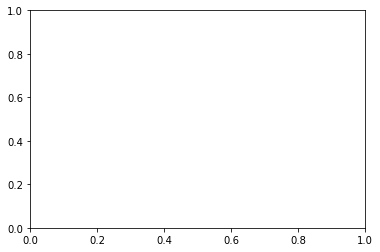